In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
train_df = pd.read_excel('titanic_train.xlsx')
test_df = pd.read_excel('titanic_test.xlsx')

In [3]:
selected_features = ['Age','TravelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor']

In [4]:
x_train = train_df[selected_features]
y_train = train_df['Survived']

x_test = test_df[selected_features]
y_test = test_df['Survived']

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.metrics import accuracy_score

In [6]:
#Logistic Regresyon için
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
param_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2','elasticnet'],'solver':solver_list}
scoring = {'Accuracy':'accuracy'}

gs = GridSearchCV(LogisticRegression(),return_train_score=True,param_grid=param_grid,scoring=scoring,cv=5,refit='Accuracy')
gs.fit(x_train,y_train)

results = gs.cv_results_

In [7]:
#KNN için
param_grid = {'n_neighbors':np.arange(1,10,1)}
scoring = {'Accuracy':'accuracy'}

gs_knn = GridSearchCV(KNeighborsClassifier(),return_train_score=True,param_grid=param_grid,scoring=scoring,cv = 10,refit='Accuracy')

gs_knn.fit(x_train,y_train)
results_knn = gs_knn.cv_results_

In [8]:
#Naive Bayes için
param_grid = {}
scoring = {'Accuracy':'accuracy'}
gs_nb = GridSearchCV(GaussianNB(),return_train_score=True,param_grid=param_grid,scoring=scoring,cv=10,refit='Accuracy')

gs_nb.fit(x_train,y_train)
results_nb = gs_nb.cv_results_

In [9]:
print('Logistic Regression için en iyi skor: ',gs.best_score_)
print('KNN için best score: ',gs_knn.best_score_)
print('NB için best score: ',gs_nb.best_score_)

Logistic Regression için en iyi skor:  0.8013558470905782
KNN için best score:  0.7632459425717852
NB için best score:  0.7632833957553059


In [10]:
train_size = range(10,len(x_train),10)
type(train_size)

range

In [11]:
#Modellerin karşılaştırmalı Öğrenme performansı

lr = gs.best_estimator_
knn = gs_knn.best_estimator_
nb = gs_nb.best_estimator_

lr_scores = list()
knn_scores = list()
nb_score = list()

train_size = range(10,len(x_train),10)
from sklearn.model_selection import train_test_split

for item in train_size:
    x_slice,_,y_slice,_ = train_test_split(x_train,y_train,train_size = item,random_state=42)
    nb.fit(x_slice,y_slice)
    nb_score.append(nb.score(x_test,y_test))
    knn.fit(x_slice,y_slice)
    knn_scores.append(knn.score(x_test,y_test))
    lr.fit(x_slice,y_slice)
    lr_scores.append(lr.score(x_test,y_test))

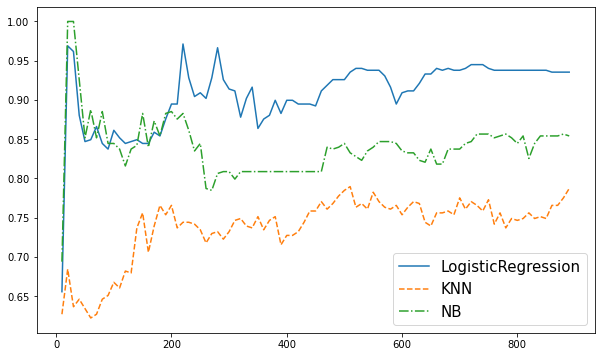

In [12]:
plt.figure(figsize=(10,6))
plt.plot(train_size,lr_scores,label='LogisticRegression')
plt.plot(train_size,knn_scores,linestyle = '--',label = 'KNN')
plt.plot(train_size,nb_score,linestyle = '-.',label = 'NB')
plt.legend(loc = 4,prop={'size':15})
plt.show()

In [14]:
#eğitim seti üzerinde oluşturduğumuz model ile test setindeki yolcuların kazadan kurtulup kurtulmayacaklarını tahmin edelim.
train_df['lg_pred_survived'] = gs.best_estimator_.predict(x_train)
train_df['knn_pred_survived'] = gs_knn.best_estimator_.predict(x_train)
train_df['nb_pred_survived'] = gs_nb.best_estimator_.predict(x_train)

test_df['lg_pred_survived'] = gs.best_estimator_.predict(x_test)
test_df['knn_pred_survived'] = gs_knn.best_estimator_.predict(x_test)
test_df['nb_pred_survived'] = gs_nb.best_estimator_.predict(x_test)

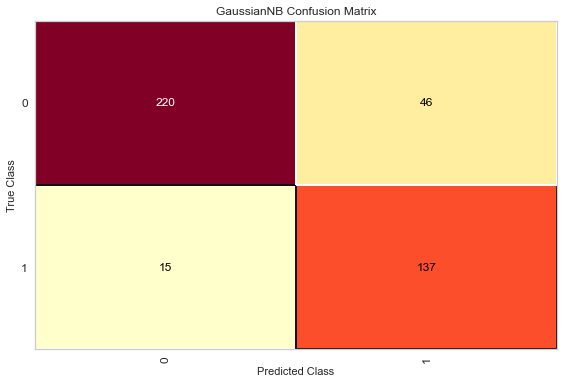

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
#Yellowbrick kütüphanesi ile hata matrisi (NB)

from yellowbrick.classifier import ConfusionMatrix
kategori = ['Non-Survived','Survived']
cm = ConfusionMatrix(nb)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.poof()

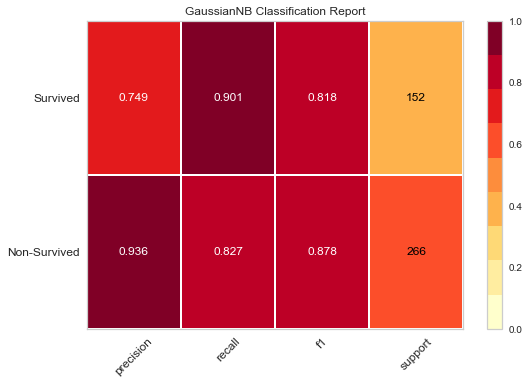

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [16]:
from yellowbrick.classifier import ClassificationReport
cr = ClassificationReport(nb,classes = kategori,support=True)
cr.fit(x_train,y_train)
cr.score(x_test,y_test)
cr.poof()

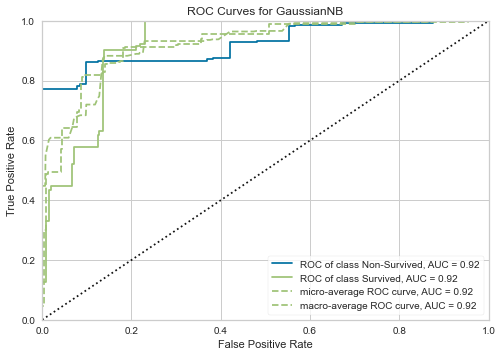

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
# Yellow brick ile ROC-AUC
from yellowbrick.classifier import ROCAUC
ROC = ROCAUC(nb,macro=True,per_class=True,classes=kategori)
ROC.fit(x_train,y_train)
ROC.score(x_test,y_test)
ROC.poof()

In [19]:
#Modelin varyans sorunu mu var ?
print('Eğitim Accuracy: ',accuracy_score(train_df['Survived'],train_df['nb_pred_survived']))
print('Test Accuracy: ',accuracy_score(test_df['Survived'],test_df['nb_pred_survived']))

Eğitim Accuracy:  0.7676767676767676
Test Accuracy:  0.854066985645933


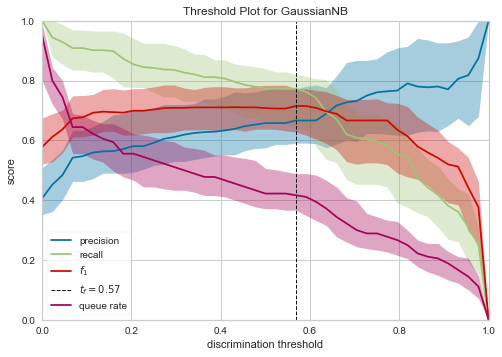

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'GaussianNB' have attribute 'force_model'

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'GaussianNB' have attribute 'force_model'

In [23]:
# Diskriminant eşiği
from yellowbrick.classifier import threshold
threshold.discrimination_threshold(nb,x_train,y_train,random_state=42,is_fitted='auto',force_model=False,show=True)